<a href="https://colab.research.google.com/github/Namtk214/Samples-of-Data-Visualizing/blob/main/Data_visualization_ETTH_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

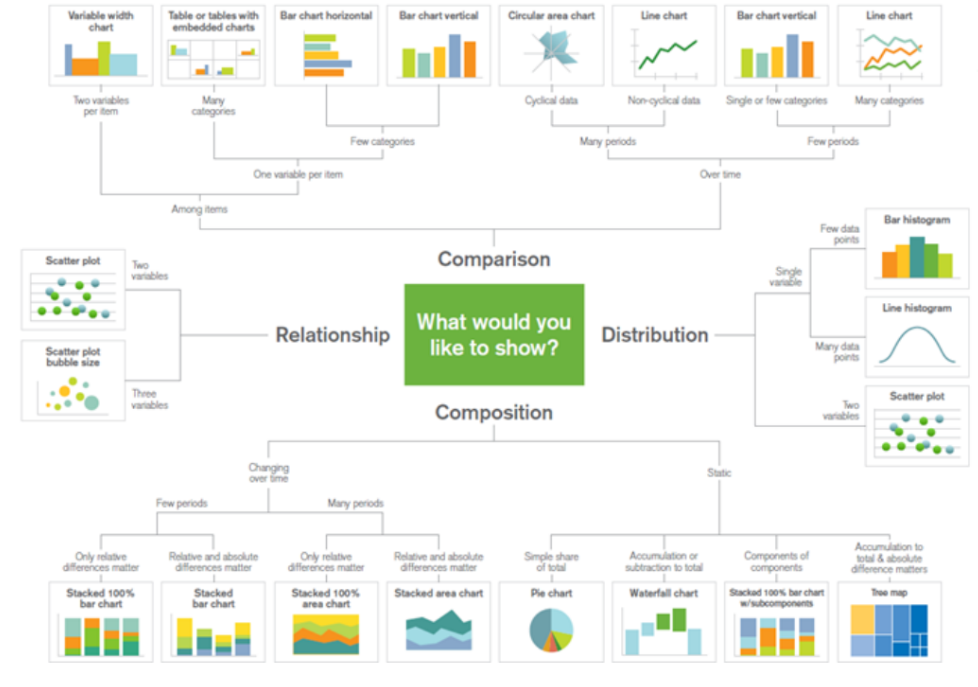

Working with electricity Transformer Dataset


In [ ]:
!wget https://github.com/zhouhaoyi/ETDataset.git


--2024-09-05 03:20:14--  https://github.com/zhouhaoyi/ETDataset.git
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/zhouhaoyi/ETDataset [following]
--2024-09-05 03:20:14--  https://github.com/zhouhaoyi/ETDataset
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ETDataset.git’

ETDataset.git           [ <=>                ] 305.70K  1.66MB/s    in 0.2s    

2024-09-05 03:20:15 (1.66 MB/s) - ‘ETDataset.git’ saved [313035]



In [ ]:
!curl -L -o ETTh1.csv https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2528k  100 2528k    0     0  2304k      0  0:00:01  0:00:01 --:--:-- 2305k


In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/ETTh1.csv', parse_dates=['date'])
df.head()
df.describe()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,2017-06-28 21:30:00,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
min,2016-07-01 00:00:00,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,2016-12-29 10:45:00,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,2017-06-28 21:30:00,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,2017-12-27 08:15:00,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,2018-06-26 19:00:00,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000
std,NaN,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946


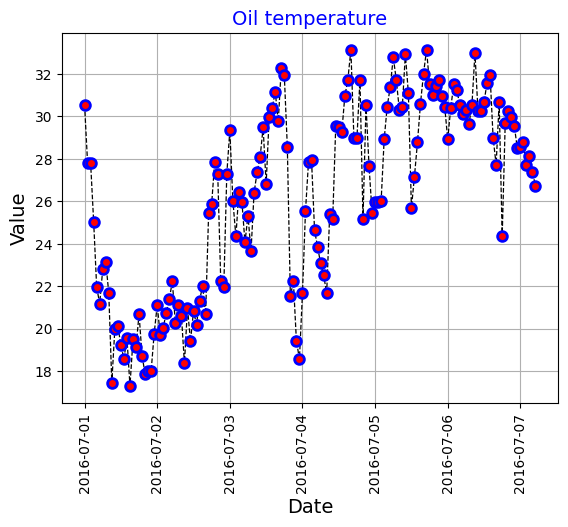

In [ ]:
#Sử dụng matplotlib
plt.plot(df.date[0:150], df.OT[0:150], marker = 'o', color = 'black',
         linewidth=0.9, linestyle='--',
         markeredgecolor= 'blue',
         markeredgewidth = '2.0',
         markerfacecolor='red', markersize=7.0)
plt.title('Oil temperature', color = 'blue', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Value', size=14)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

(array([16983., 16984., 16985., 16986., 16987., 16988., 16989.]),
 [Text(16983.0, 0, '2016-07-01'),
  Text(16984.0, 0, '2016-07-02'),
  Text(16985.0, 0, '2016-07-03'),
  Text(16986.0, 0, '2016-07-04'),
  Text(16987.0, 0, '2016-07-05'),
  Text(16988.0, 0, '2016-07-06'),
  Text(16989.0, 0, '2016-07-07')])

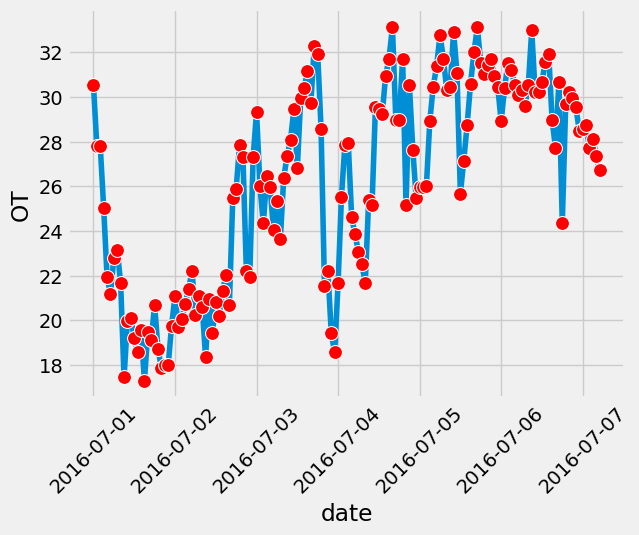

In [ ]:
sns.lineplot(data=df, x=df.date[0:150], y=df.OT[0:150], marker='o',
             markersize=10, markerfacecolor='red')
plt.xticks(rotation=45)

In [ ]:
# Sử dụng thư viện plotly (dynamic plot)
fig = px.line(df, x=df.date[0:150], y=df.OT[0:150], title='Oil Temperature', markers=True)
fig.update_layout(xaxis_title='Date', yaxis_title='Value')
fig.show()
#

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


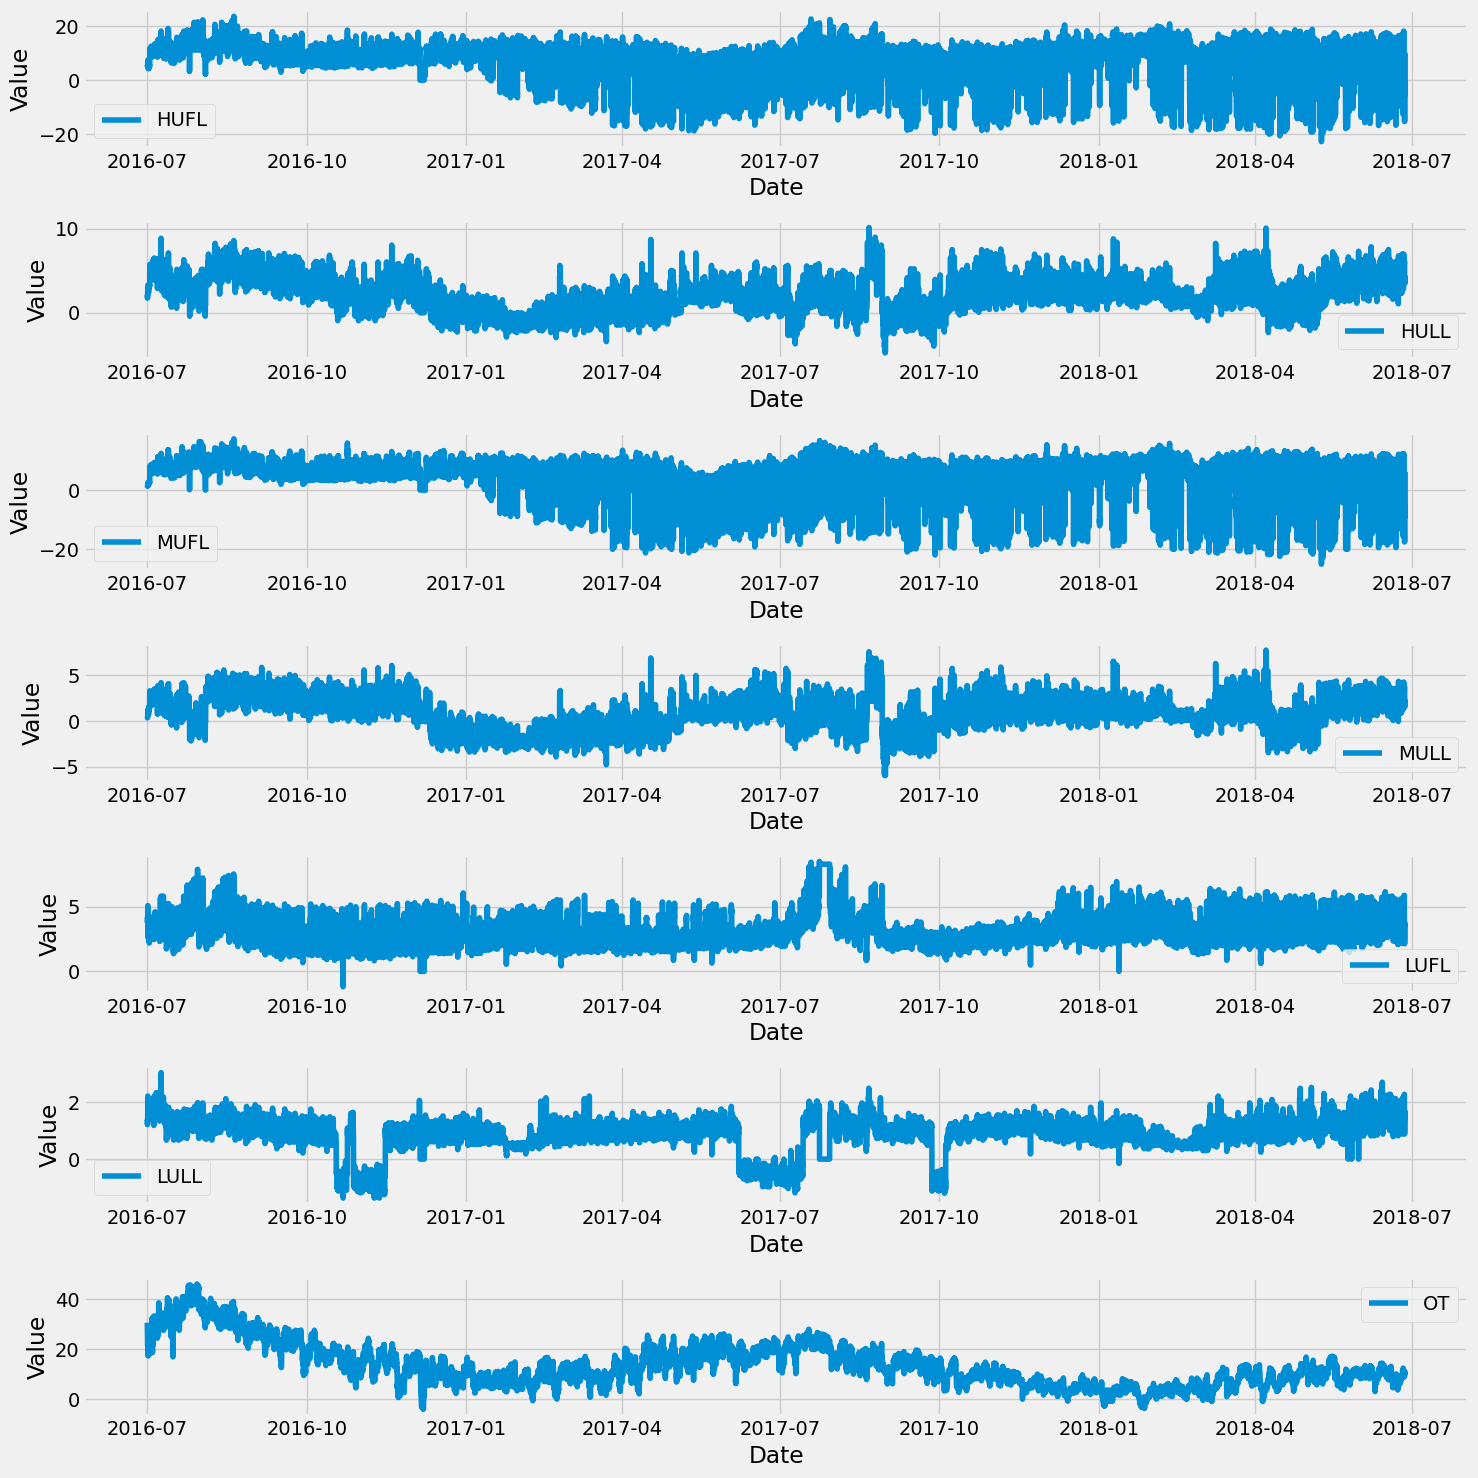

In [ ]:
#Multiple plot Line
fig, axes = plt.subplots(7, 1, figsize=(15, 15))
for i, column in enumerate(df.columns[1:]):
  axes[i].plot(df.date, df[column], label=column)
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Value')
  axes[i].legend()
plt.tight_layout()
plt.show()

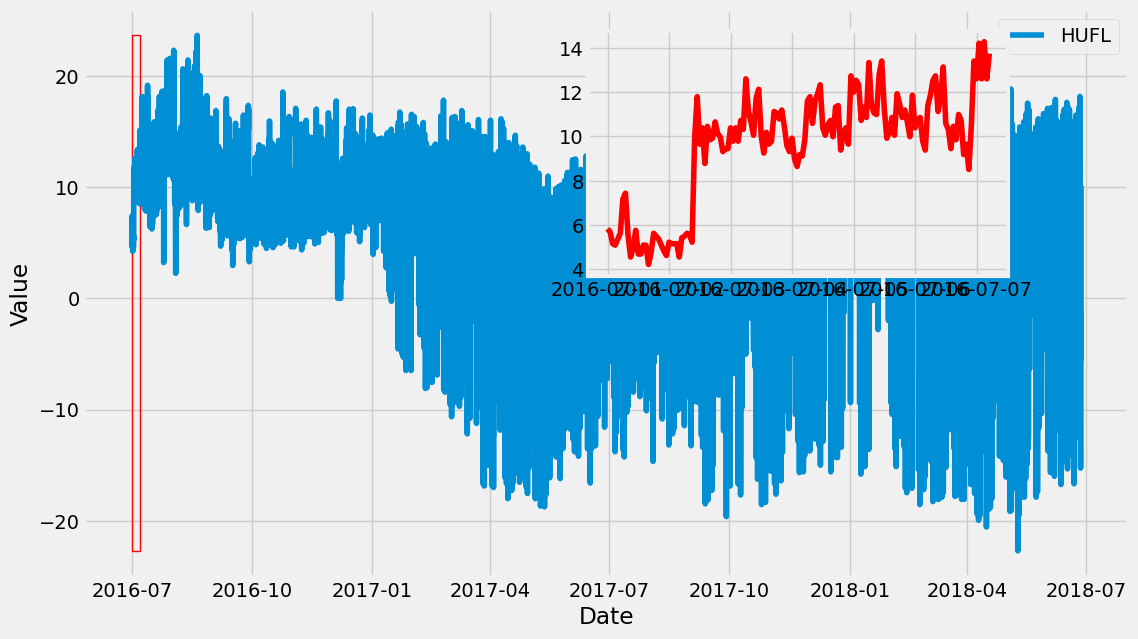

In [ ]:
#Line chart with zoom in period
#Chọn mốc
start = 0
end = 150
#tạo main line chart with highlighted square
fig, ax = plt.subplots(figsize=(12, 7))
# Tạo main line chart với selected variable
ax.plot(df['date'], df['HUFL'], label='HUFL')
# Tạo một rectangle để zoom vào phần cần
rect = plt.Rectangle((df['date'][start], min(df['HUFL'])),
                     df['date'][end] - df['date'][start], max(df['HUFL']) - min(df['HUFL']),
                     linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
#Tạo insert zoomed in plot
ax_insert = fig.add_axes([0.5, 0.5, 0.35, 0.35])
ax_insert.plot(df['date'][start:end], df['HUFL'][start:end], color='r')
# Labels...
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

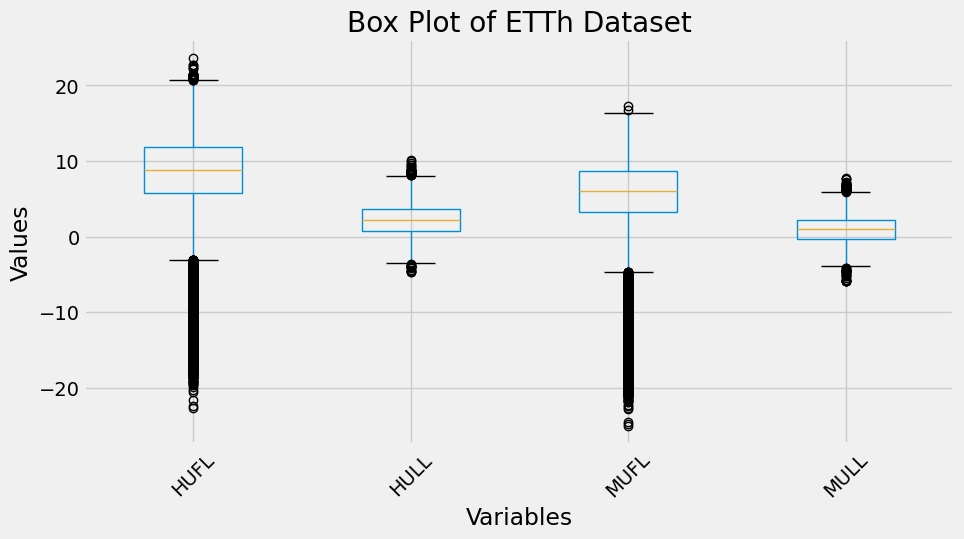

In [ ]:
import matplotlib.pyplot as plt

#data = load_etth_data()
plt.figure(figsize=(10,5))
df.boxplot(column=['HUFL', 'HULL', 'MUFL', 'MULL'])
plt.title('Box Plot of ETTh Dataset')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


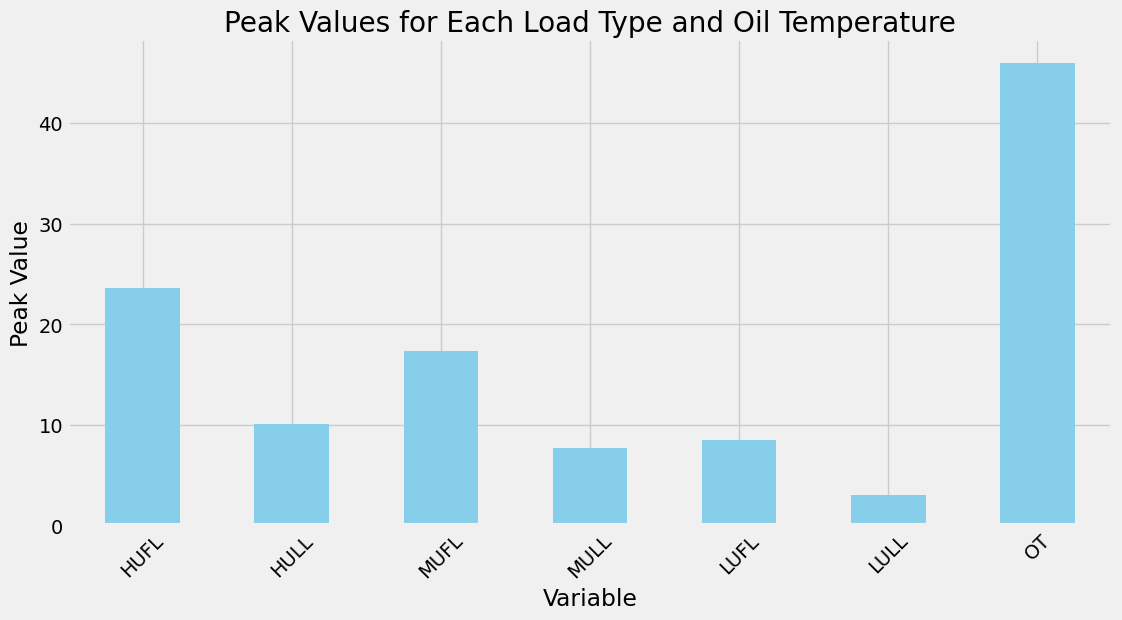

In [ ]:
# Use matplotlib
# Identifying peak values and their corresponding times for each column
peak_values = df.max()
peak_times = df.idxmax()

# Creating a DataFrame to display peak values and their times
peak_analysis = pd.DataFrame({'Peak Value': peak_values, 'Peak Time': peak_times})

# Dropping the 'date' column as it's not a load or temperature type
peak_analysis = peak_analysis.drop('date')

# Plotting the peak values for visual representation
plt.figure(figsize=(12, 6))
peak_analysis['Peak Value'].plot(kind='bar', color='skyblue')
plt.title('Peak Values for Each Load Type and Oil Temperature')
plt.xlabel('Variable')
plt.ylabel('Peak Value')
plt.xticks(rotation=45)
plt.show()

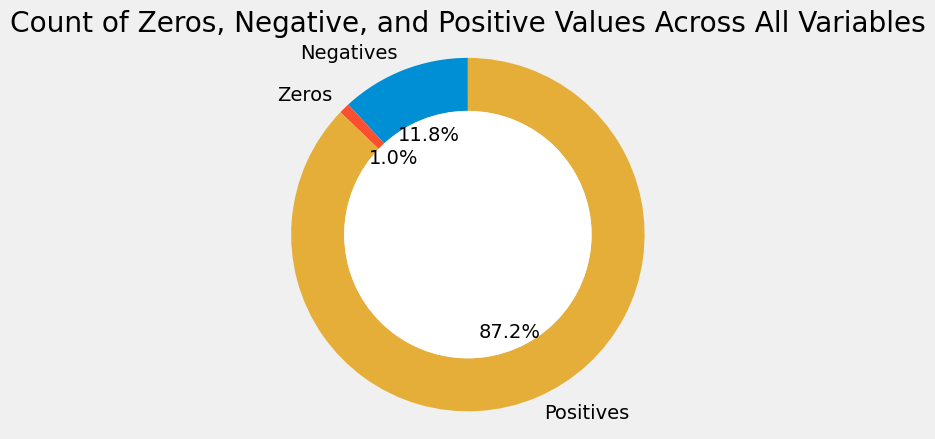

In [ ]:
# Donut chart
# Preparing the data for the stacked bar chart to count zeros, negatives, and positives for each variable
counts = {column: [
                    np.sum(df[column] < 0),
                    np.sum(df[column] == 0),
                    np.sum(df[column] > 0)
                    ]
            for column in df.columns[1:]} # Removed extra indent and added colon to the end of for loop


# Creating a DataFrame from the counts dictionary
counts_df = pd.DataFrame(counts, index=['Negatives', 'Zeros', 'Positives']).T

# Preparing data for the donut chart
counts_for_donut = counts_df.sum()

# Plotting the donut chart
fig, ax = plt.subplots()
ax.pie(counts_for_donut, labels=counts_for_donut.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center to create a donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Count of Zeros, Negative, and Positive Values Across All Variables')
plt.show()

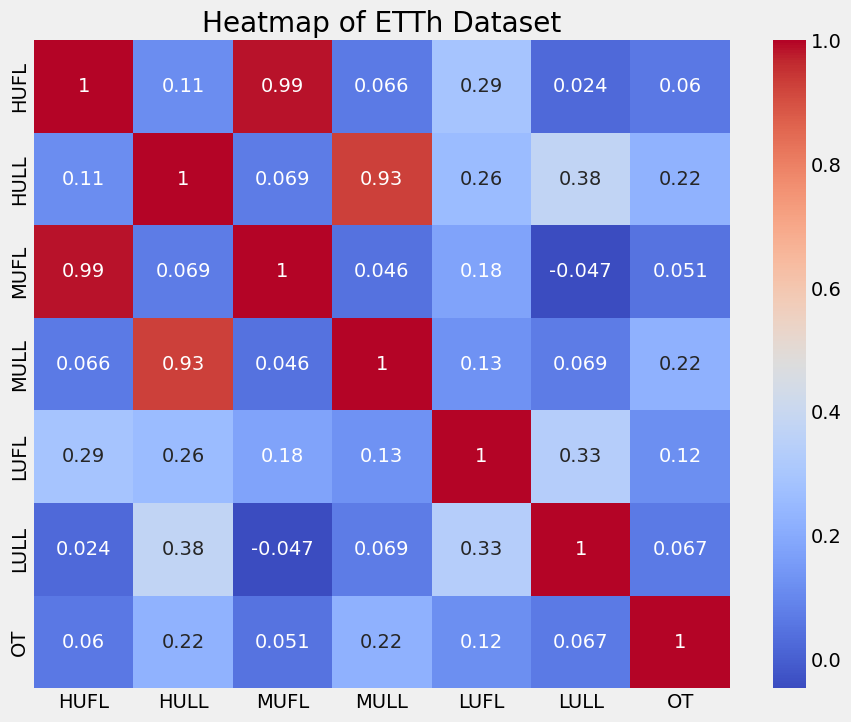

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of ETTh Dataset')
plt.show()


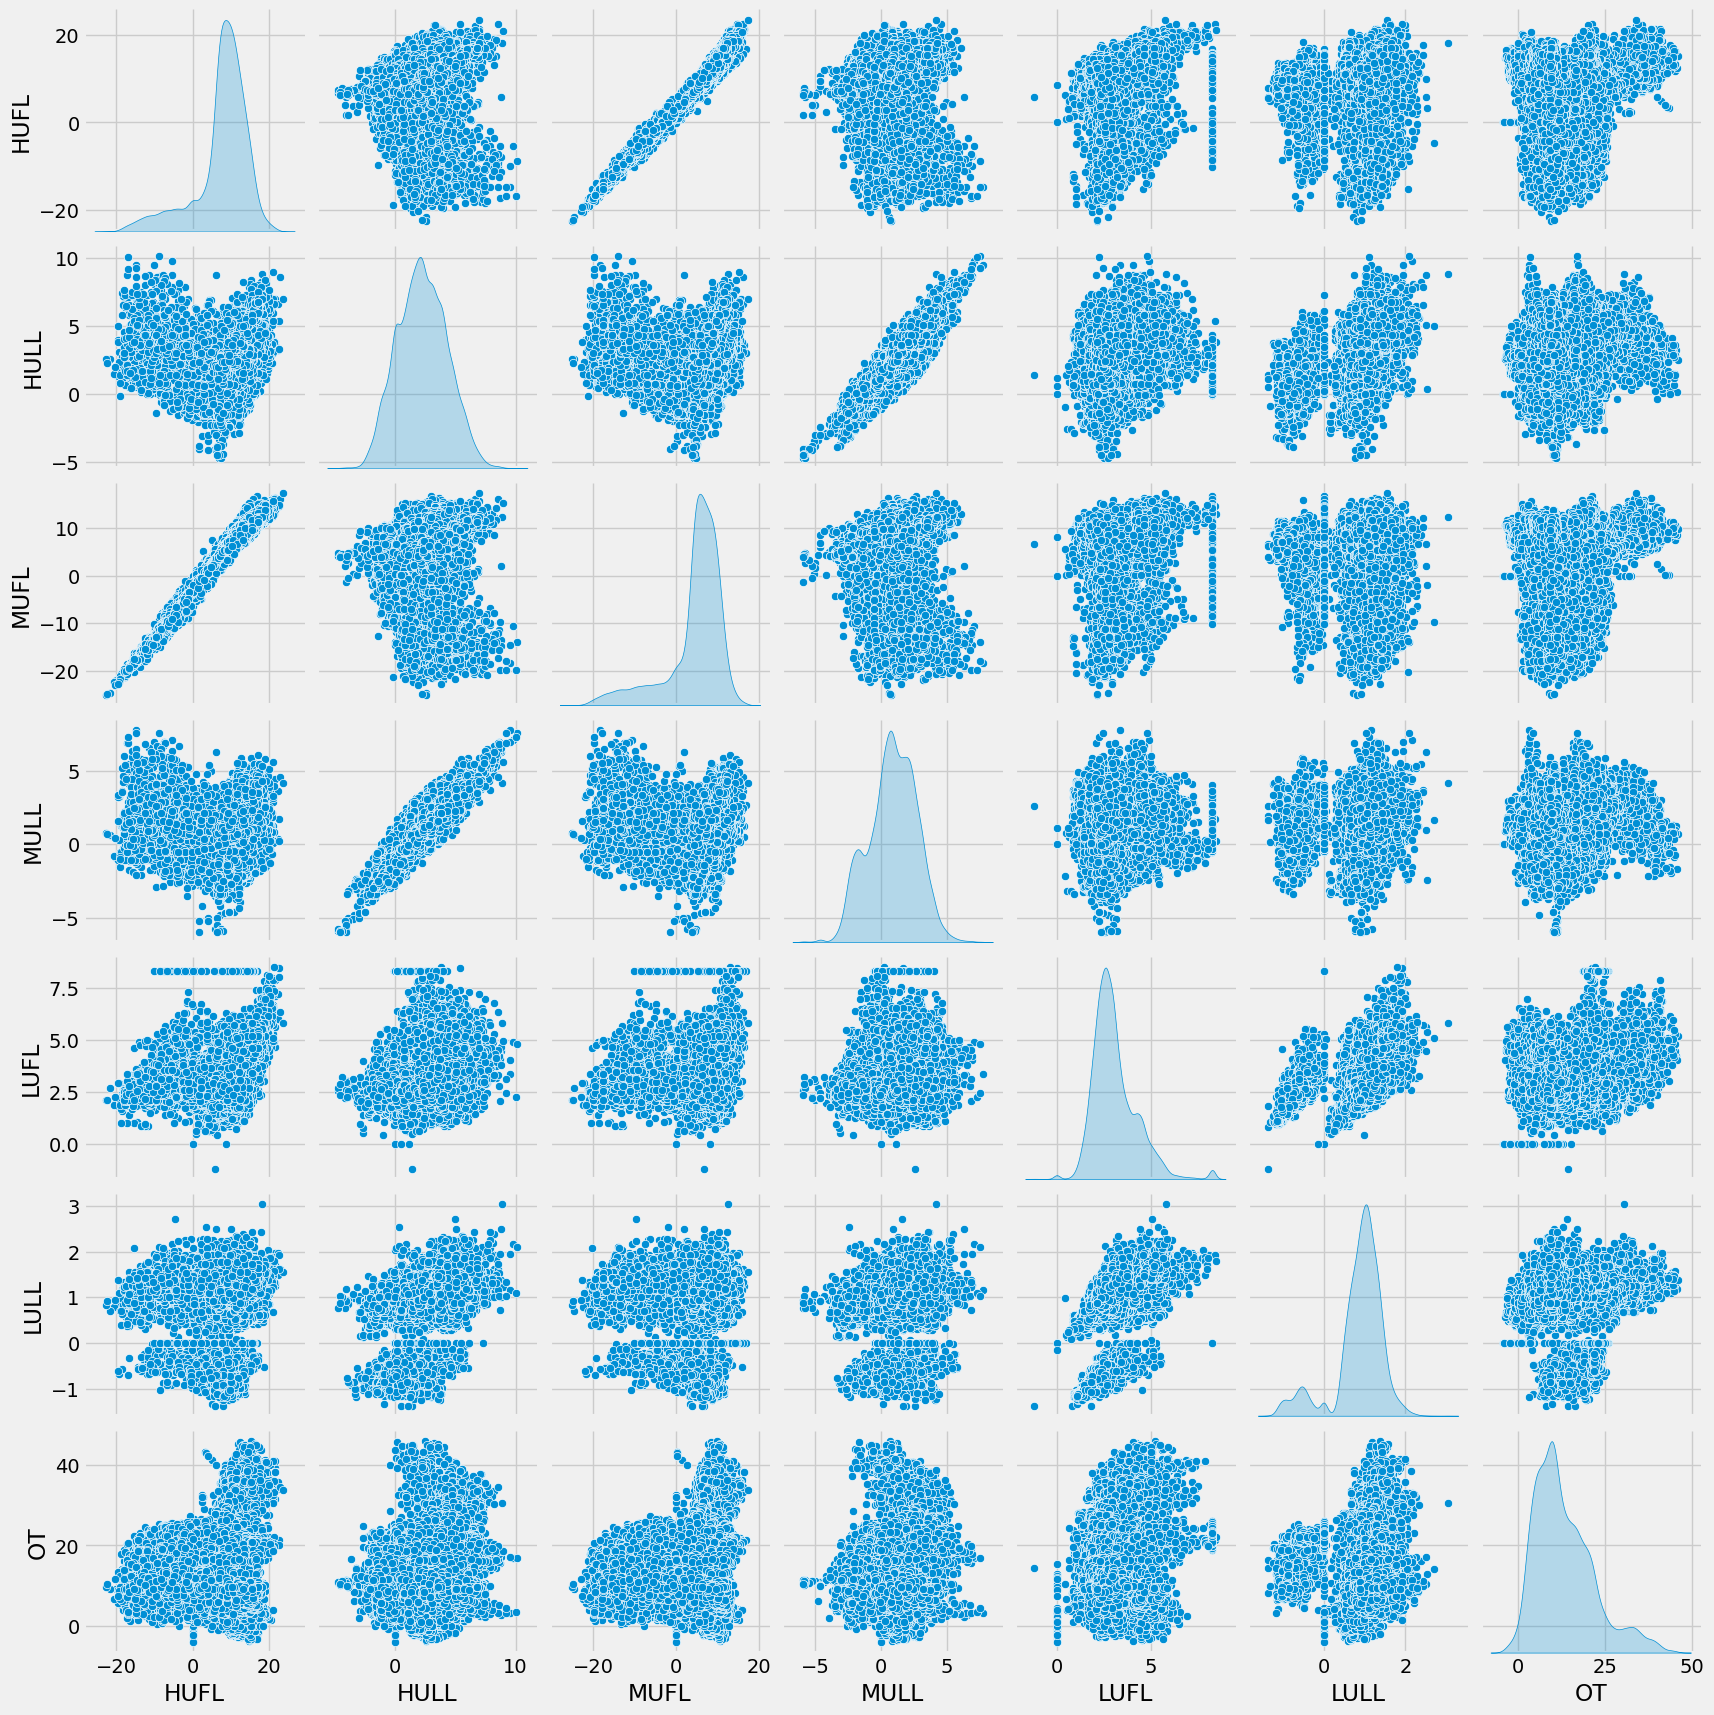

In [28]:
sns.pairplot(df, diag_kind='kde')
plt.show()
#